[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Abdul_Razzak_Ghan_2000/figs1-5.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Abdul_Razzak_Ghan_2000/figs1-5.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Abdul_Razzak_Ghan_2000/figs1-5.ipynb)

#### based on Figs. 1-5 from Abdul-Razzak and Ghan 2000 (JGR: Atmos.)  "_A parameterization of aerosol activation: 2. Multiple aerosol types_"
https://doi.org/10.1029/1999JD901161

In [1]:
import os, sys
os.environ['NUMBA_THREADING_LAYER'] = 'workqueue'  # PySDM & PyMPDATA don't work with TBB; OpenMP has extra dependencies on macOS
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples', 'PySDM')

In [8]:
import numpy as np
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot
from PySDM.physics import si

from PySDM_examples.Abdul_Razzak_Ghan_2000.run_ARG_parcel import run_parcel
from PySDM_examples.Abdul_Razzak_Ghan_2000 import data_from_ARG2000_paper as ARG_paper
from PySDM_examples.Abdul_Razzak_Ghan_2000 import data_from_CloudMicrophysics_ARG as ARG_CMjl

n_sd_per_mode = 10

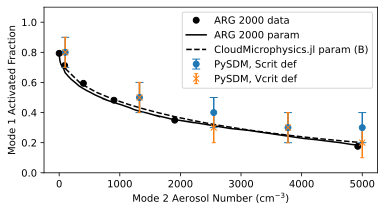

HTML(value="<a href='./fig_1.pdf' target='_blank'>./fig_1.pdf</a><br>")

In [3]:
N2 = np.linspace(100,5000,5) / si.cm**3
AF_S = np.zeros((2,len(N2)))
AF_V = np.zeros((2,len(N2)))
AFerror = np.zeros(len(N2))

w = 0.5 * si.m / si.s
sol2 = 1.0 # 100% ammonium sulfate
rad2 = 50.0 * si.nm

for i,N2i in enumerate(N2):
    output = run_parcel(w, sol2, N2i, rad2, n_sd_per_mode)
    AF_S[:,i] = output.activated_fraction_S
    AF_V[:,i] = output.activated_fraction_V
    AFerror[i] = output.error[0]

fig, ax = pyplot.subplots(1, 1, sharex=True, figsize=(6,3))
ax.plot(ARG_paper.Fig1_N2_obs, ARG_paper.Fig1_AF_obs, "ko", label="ARG 2000 data")
ax.plot(ARG_paper.Fig1_N2_param, ARG_paper.Fig1_AF_param, "k-", label="ARG 2000 param")

ax.plot(ARG_CMjl.Fig1_N2_param_jl, ARG_CMjl.Fig1_AF_param_jl_B, "k--", label="CloudMicrophysics.jl param (B)")

ax.errorbar(N2 * si.cm**3, AF_S[0,:], yerr=AFerror, fmt='o', capsize=4, label="PySDM, Scrit def")
ax.errorbar(N2 * si.cm**3, AF_V[0,:], yerr=AFerror, fmt='x', capsize=2, label="PySDM, Vcrit def")
ax.set_ylabel('Mode 1 Activated Fraction')
ax.set_ylim([0,1.1])

pyplot.xlabel('Mode 2 Aerosol Number (cm$^{-3}$)')
pyplot.legend(loc="best")
show_plot("fig_1.pdf")

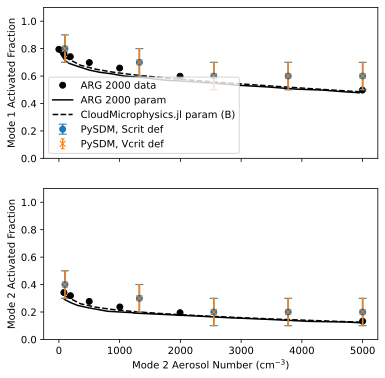

HTML(value="<a href='./fig_2.pdf' target='_blank'>./fig_2.pdf</a><br>")

In [4]:
N2 = np.linspace(100,5000,5) / si.cm**3
AF_S = np.zeros((2,len(N2)))
AF_V = np.zeros((2,len(N2)))
AFerror = np.zeros(len(N2))

w = 0.5 * si.m / si.s
sol2 = 0.1 # 10% ammonium sulfate, 90% insoluble
rad2 = 50.0 * si.nm

for i,N2i in enumerate(N2):
    output = run_parcel(w, sol2, N2i, rad2, n_sd_per_mode)
    AF_S[:,i] = output.activated_fraction_S
    AF_V[:,i] = output.activated_fraction_V
    AFerror[i] = output.error[0]

fig, axes = pyplot.subplots(2, 1, sharex=True, figsize=(6,6))
axes[0].plot(ARG_paper.Fig2a_N2_obs, ARG_paper.Fig2a_AF_obs, "ko", label="ARG 2000 data")
axes[0].plot(ARG_paper.Fig2a_N2_param, ARG_paper.Fig2a_AF_param, "k-", label="ARG 2000 param")
axes[0].plot(ARG_CMjl.Fig2_N2_param_jl, ARG_CMjl.Fig2a_AF_param_jl_B, "k--", label="CloudMicrophysics.jl param (B)")
axes[1].plot(ARG_paper.Fig2b_N2_obs, ARG_paper.Fig2b_AF_obs, "ko")
axes[1].plot(ARG_paper.Fig2b_N2_param, ARG_paper.Fig2b_AF_param, "k-", label="ARG 2000 param")
axes[1].plot(ARG_CMjl.Fig2_N2_param_jl, ARG_CMjl.Fig2b_AF_param_jl_B, "k--", label="CloudMicrophysics.jl param (B)")

for i, ax in enumerate(axes):
    ax.errorbar(N2 * si.cm**3, AF_S[i,:], yerr=AFerror, fmt='o', capsize=4, label="PySDM, Scrit def")
    ax.errorbar(N2 * si.cm**3, AF_V[i,:], yerr=AFerror, fmt='x', capsize=2, label="PySDM, Vcrit def")
    ax.set_ylabel(f'Mode {i+1} Activated Fraction')
    ax.set_ylim([0,1.1])

pyplot.xlabel('Mode 2 Aerosol Number (cm$^{-3}$)')
axes[0].legend(loc="best")
show_plot("fig_2.pdf")

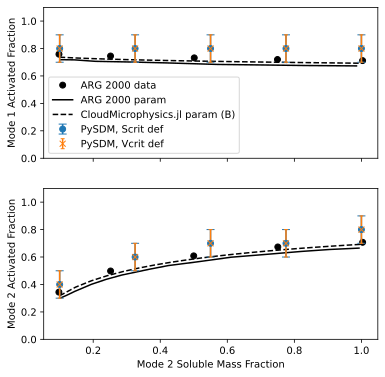

HTML(value="<a href='./fig_3.pdf' target='_blank'>./fig_3.pdf</a><br>")

In [5]:
sol2 = np.linspace(0.1,1,5) # X% ammonium sulfate, (1-X)% insoluble
AF_S = np.zeros((2,len(sol2)))
AF_V = np.zeros((2,len(sol2)))
AFerror = np.zeros(len(sol2))

w = 0.5 * si.m / si.s
N2 = 100 / si.cm**3
rad2 = 50.0 * si.nm

for i,sol2i in enumerate(sol2):
    output = run_parcel(w, sol2i, N2, rad2, n_sd_per_mode)
    AF_S[:,i] = output.activated_fraction_S
    AF_V[:,i] = output.activated_fraction_V
    AFerror[i] = output.error[0]

fig, axes = pyplot.subplots(2, 1, sharex=True, figsize=(6,6))
axes[0].plot(ARG_paper.Fig3a_sol2_obs, ARG_paper.Fig3a_AF_obs, "ko", label="ARG 2000 data")
axes[0].plot(ARG_paper.Fig3a_sol2_param, ARG_paper.Fig3a_AF_param, "k-", label="ARG 2000 param")
axes[0].plot(ARG_CMjl.Fig3_sol2_param_jl, ARG_CMjl.Fig3a_AF_param_jl_B, "k--", label="CloudMicrophysics.jl param (B)")
axes[1].plot(ARG_paper.Fig3b_sol2_obs, ARG_paper.Fig3b_AF_obs, "ko")
axes[1].plot(ARG_paper.Fig3b_sol2_param, ARG_paper.Fig3b_AF_param, "k-", label="ARG 2000 param")
axes[1].plot(ARG_CMjl.Fig3_sol2_param_jl, ARG_CMjl.Fig3b_AF_param_jl_B, "k--", label="CloudMicrophysics.jl param (B)")

for i, ax in enumerate(axes):
    ax.errorbar(sol2, AF_S[i,:], yerr=AFerror, fmt='o', capsize=4, label="PySDM, Scrit def")
    ax.errorbar(sol2, AF_V[i,:], yerr=AFerror, fmt='x', capsize=2, label="PySDM, Vcrit def")
    ax.set_ylabel(f'Mode {i+1} Activated Fraction')
    ax.set_ylim([0,1.1])

pyplot.xlabel('Mode 2 Soluble Mass Fraction')
axes[0].legend(loc="best")
show_plot("fig_3.pdf")

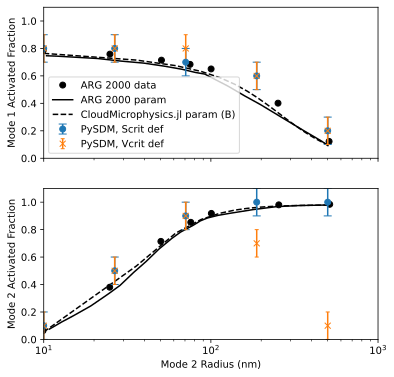

HTML(value="<a href='./fig_4.pdf' target='_blank'>./fig_4.pdf</a><br>")

In [6]:
rad2 = np.geomspace(10,500,5) * si.nm
AF_S = np.zeros((2,len(rad2)))
AF_V = np.zeros((2,len(rad2)))
AFerror = np.zeros(len(rad2))

w = 0.5 * si.m / si.s
N2 = 100 / si.cm**3
sol2 = 1 # 100% ammonium sulfate

for i,rad2i in enumerate(rad2):
    output = run_parcel(w, sol2, N2, rad2i, n_sd_per_mode)
    AF_S[:,i] = output.activated_fraction_S
    AF_V[:,i] = output.activated_fraction_V
    AFerror[i] = output.error[0]

fig, axes = pyplot.subplots(2, 1, sharex=True, figsize=(6,6))
axes[0].plot(np.asarray(ARG_paper.Fig4a_rad2_obs)*1e3, ARG_paper.Fig4a_AF_obs, "ko", label="ARG 2000 data")
axes[0].plot(np.asarray(ARG_paper.Fig4a_rad2_param)*1e3, ARG_paper.Fig4a_AF_param, "k-", label="ARG 2000 param")
axes[0].plot(np.asarray(ARG_CMjl.Fig4_rad2_param_jl)*1e3, ARG_CMjl.Fig4a_AF_param_jl_B, "k--", label="CloudMicrophysics.jl param (B)")
axes[1].plot(np.asarray(ARG_paper.Fig4b_rad2_obs)*1e3, ARG_paper.Fig4b_AF_obs, "ko")
axes[1].plot(np.asarray(ARG_paper.Fig4b_rad2_param)*1e3, ARG_paper.Fig4b_AF_param, "k-", label="ARG 2000 param")
axes[1].plot(np.asarray(ARG_CMjl.Fig4_rad2_param_jl)*1e3, ARG_CMjl.Fig4b_AF_param_jl_B, "k--", label="CloudMicrophysics.jl param (B)")

for i, ax in enumerate(axes):
    ax.errorbar(rad2 / si.nm, AF_S[i,:], yerr=AFerror, fmt='o', capsize=4, label="PySDM, Scrit def")
    ax.errorbar(rad2 / si.nm, AF_V[i,:], yerr=AFerror, fmt='x', capsize=2, label="PySDM, Vcrit def")
    ax.set_ylabel(f'Mode {i+1} Activated Fraction')
    ax.set_ylim([0,1.1])
    ax.set_xscale('log')
    ax.set_xlim([10,1000])

pyplot.xlabel('Mode 2 Radius (nm)')
axes[0].legend(loc="best")
show_plot("fig_4.pdf")

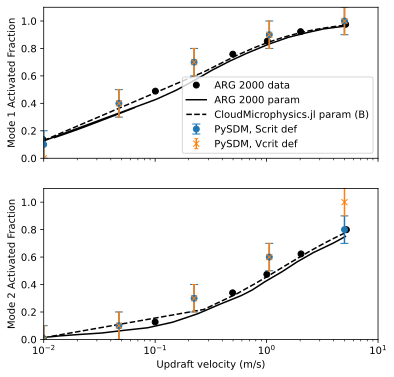

HTML(value="<a href='./fig_5.pdf' target='_blank'>./fig_5.pdf</a><br>")

In [7]:
w = np.geomspace(0.01, 5, 5) * si.m / si.s
AF_S = np.zeros((2,len(w)))
AF_V = np.zeros((2,len(w)))
AFerror = np.zeros(len(w))

N2 = 100 / si.cm**3
rad2 = 50.0 * si.nm
sol2 = 0.1 # 10% ammonium sulfate; 90% insoluble

for i,wi in enumerate(w):
    output = run_parcel(wi, sol2, N2, rad2, n_sd_per_mode)
    AF_S[:,i] = output.activated_fraction_S
    AF_V[:,i] = output.activated_fraction_V
    AFerror[i] = output.error[0]

fig, axes = pyplot.subplots(2, 1, sharex=True, figsize=(6,6))
axes[0].plot(ARG_paper.Fig5a_w_obs, ARG_paper.Fig5a_AF_obs, "ko", label="ARG 2000 data")
axes[0].plot(ARG_paper.Fig5a_w_param, ARG_paper.Fig5a_AF_param, "k-", label="ARG 2000 param")
axes[0].plot(ARG_CMjl.Fig5_w_param_jl, ARG_CMjl.Fig5a_AF_param_jl_B, "k--", label="CloudMicrophysics.jl param (B)")
axes[1].plot(ARG_paper.Fig5b_w_obs, ARG_paper.Fig5b_AF_obs, "ko")
axes[1].plot(ARG_paper.Fig5b_w_param, ARG_paper.Fig5b_AF_param, "k-", label="ARG 2000 param")
axes[1].plot(ARG_CMjl.Fig5_w_param_jl, ARG_CMjl.Fig5b_AF_param_jl_B, "k--", label="CloudMicrophysics.jl param (B)")

for i, ax in enumerate(axes):
    ax.errorbar(w, AF_S[i,:], yerr=AFerror, fmt='o', capsize=4, label="PySDM, Scrit def")
    ax.errorbar(w, AF_V[i,:], yerr=AFerror, fmt='x', capsize=2, label="PySDM, Vcrit def")
    ax.set_ylabel(f'Mode {i+1} Activated Fraction')
    ax.set_ylim([0,1.1])
    ax.set_xscale('log')
    ax.set_xlim([0.01, 10])

pyplot.xlabel('Updraft velocity (m/s)')
axes[0].legend(loc="best")
show_plot("fig_5.pdf")